In my 002jupyter notebook on gender tipping, http://bit.ly/2pPOkV6 ,  I end the notebook with descriptive statistics, means and standard deviations. 

This gif compelled me to come back and create simple visualizations: https://www.autodeskresearch.com/publications/samestats
instead of just leaving it to descriptive statistics which may not tell the whole story.

So I decided to make some quick scatter plots on the 7 buckets I defined at the end of 002 pizza delivery notebook. I won't add much analysis for now but I plan on revisiting this in the future.

In [1]:
import pandas as pd
import matplotlib.pyplot as pl #common convention is to use "as plt"
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

data = pd.read_csv('../RawDelData.csv')
ylabel = 'Order Amount'
xlabel = 'Tip in $'
data.head()

,Key,Date,mmdd,DayOfTheWeek,Area,Distance,Timestamp,Tip,OrderAmount,TipPercent,Housing,GenderOfTipper,Cash/Credit_Tip,Cash/Credit_Order,PersonWhoDelivered,Area(text),Latitude,Longitude,month
0,1,42196,711,Saturday,6,2.2,0.736111,5.06,19.94,25.376128,House,Female,Cash,Cash,Angel,Collister - Gary (North of State),43.666573,-116.263356,Jul
1,2,42293,1016,Friday,9,1.0,0.736111,4.17,20.83,20.019203,House,Male,Cash,Cash,Sammie,WhiteWater - Gary (South of State),43.652722,-116.259743,Oct
2,3,42232,816,Sunday,2,3.0,0.734722,2.00,15.27,13.097577,Apartment,Male,Cash,Credit,Sammie,WhiteWater - Downtown (South of State),43.624462,-116.218350,Aug
3,4,42265,918,Friday,6,1.8,0.734722,3.00,27.63,10.857763,House,Female,Credit,Credit,Sammie,Collister - Gary (North of State),43.666573,-116.263356,Sep
4,5,42204,719,Sunday,6,1.3,0.734028,3.50,32.13,10.893246,Apartment,Male,Credit,Credit,Angel,Collister - Gary (North of State),43.666573,-116.263356,Jul


In [2]:
#Creating a function so I don't have to duplicate code
def create_scatter(df, title_name):
    pl.scatter(df.Tip, df.OrderAmount)
    n = len(df)
    pl.title('n = %s' %n, fontsize=22)
    pl.suptitle(title_name, fontsize=22)
    pl.ylabel(ylabel, fontsize=18)
    pl.xlabel(xlabel, fontsize=18)
    pl.xlim(-0.25, 15) #The right bound excludes outliers in the visualization but not the sample count
    pl.ylim(-0.30, 80) #DITTO the comment above
    pl.rcParams['figure.figsize'] = (15, 10)
    pl.show()

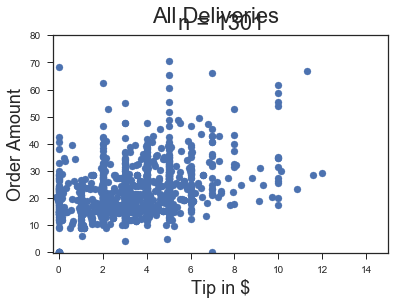

In [3]:
create_scatter(data, 'All Deliveries')

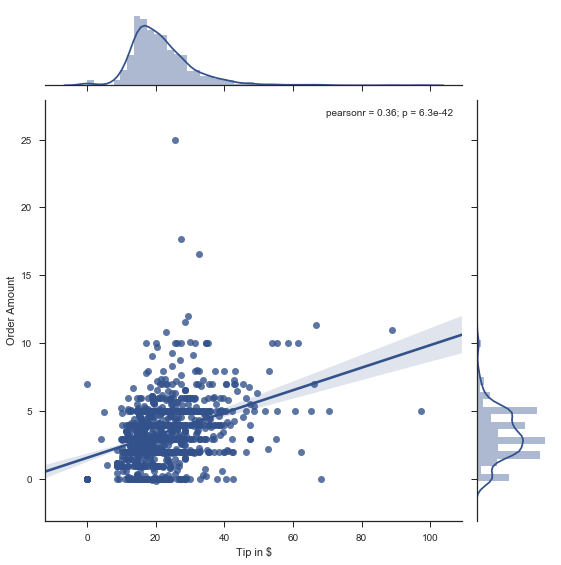

In [4]:
# I would recommend making all plots similar to this or the next one

x = data['OrderAmount']
y = data['Tip']

xyplot = sns.jointplot(x, y, kind="reg", color="#33528c", size=8, dropna=True)
xyplot.set_axis_labels(xlabel,ylabel)

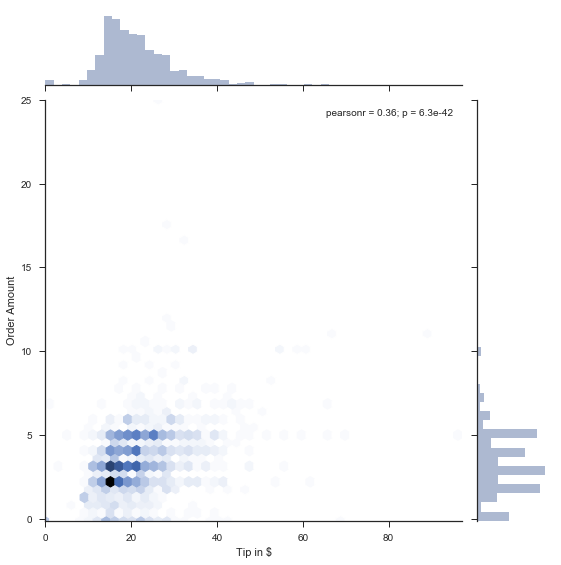

In [5]:
x = data['OrderAmount']
y = data['Tip']

xyplot = sns.jointplot(x, y, kind="hex", color="#33528c", size=8, dropna=True)
xyplot.set_axis_labels(xlabel,ylabel)

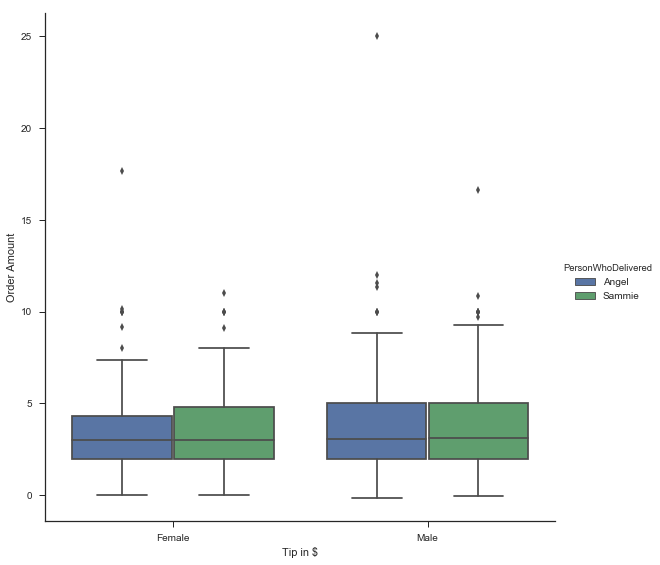

In [6]:
# Comparison in the following cases could be better off as boxpots perhaps?
bplots = sns.factorplot("GenderOfTipper", "Tip", "PersonWhoDelivered", data, kind="box", size=8)
bplots.set_axis_labels(xlabel,ylabel)

In [7]:
#Creating a function so I don't have to duplicate code
def create_scatter(df, title_name):
    pl.scatter(df.Tip, df.OrderAmount)
    n = len(df)
    pl.title('n = %s' %n, fontsize=22)
    pl.suptitle(title_name, fontsize=22)
    pl.ylabel(ylabel, fontsize=18)
    pl.xlabel(xlabel, fontsize=18)
    pl.xlim(-0.25, 15) #The right bound excludes outliers in the visualization but not the sample count
    pl.ylim(-0.30, 80) #DITTO the comment above
    pl.rcParams['figure.figsize'] = (15, 10)
    pl.show()

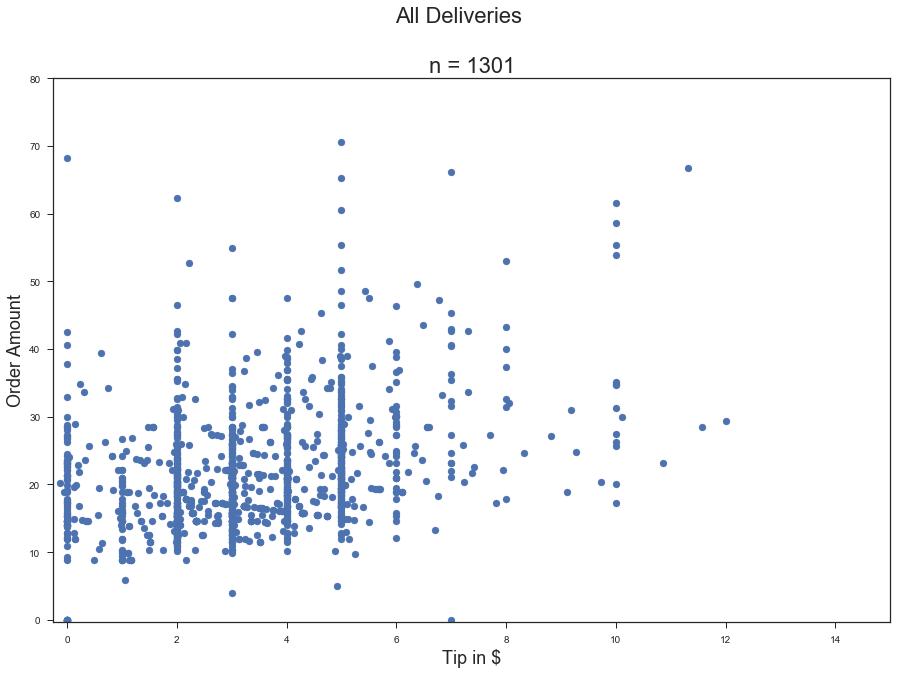

In [8]:
create_scatter(data, 'All Deliveries')

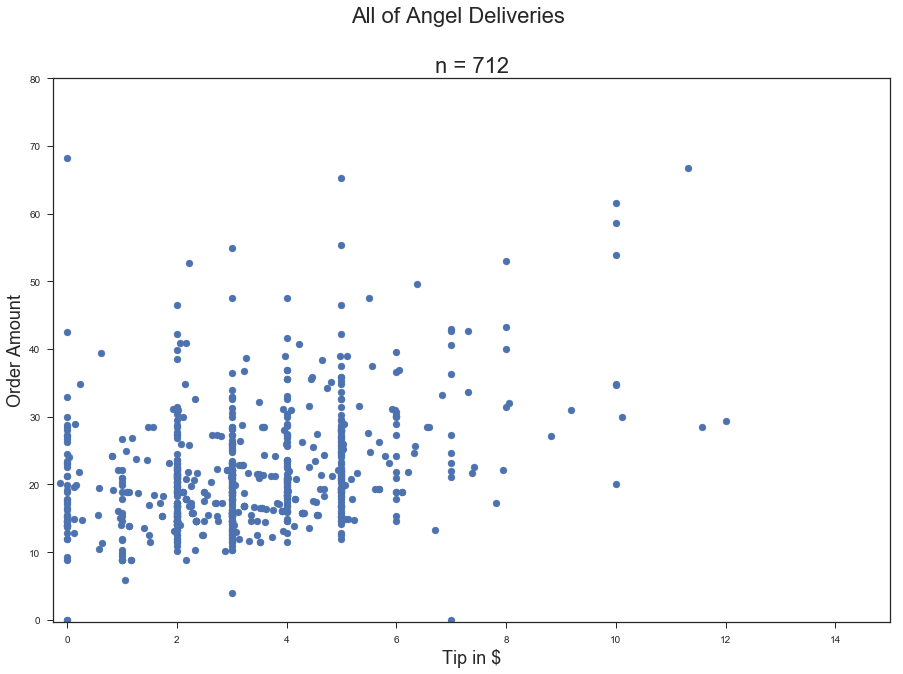

In [9]:
angel_tip = data.loc[data['PersonWhoDelivered']=='Angel']
create_scatter(angel_tip, 'All of Angel Deliveries')

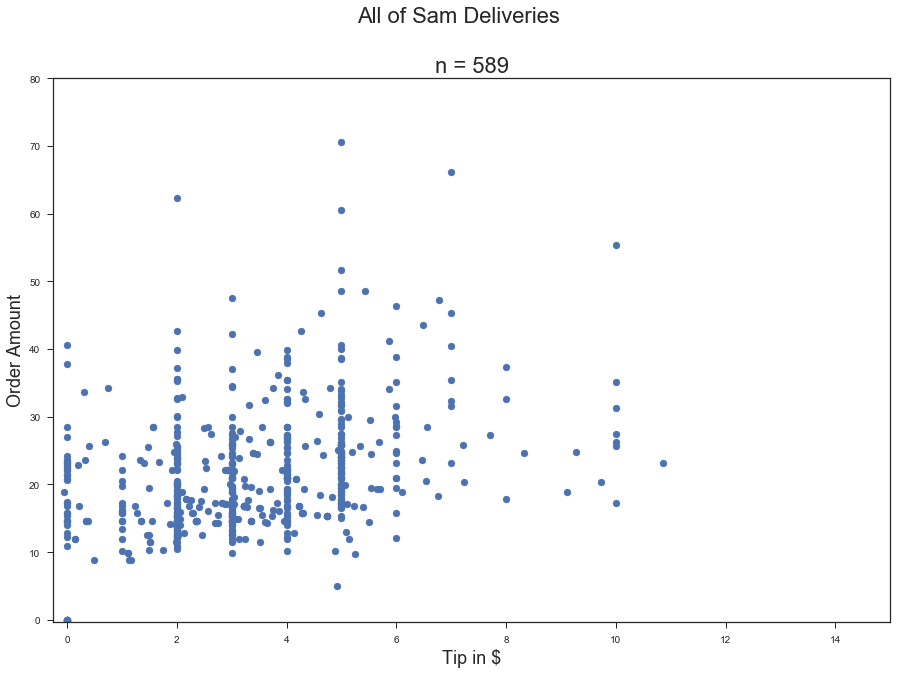

In [10]:
sam_tip = data.loc[data['PersonWhoDelivered']=='Sammie']
create_scatter(sam_tip, 'All of Sam Deliveries')

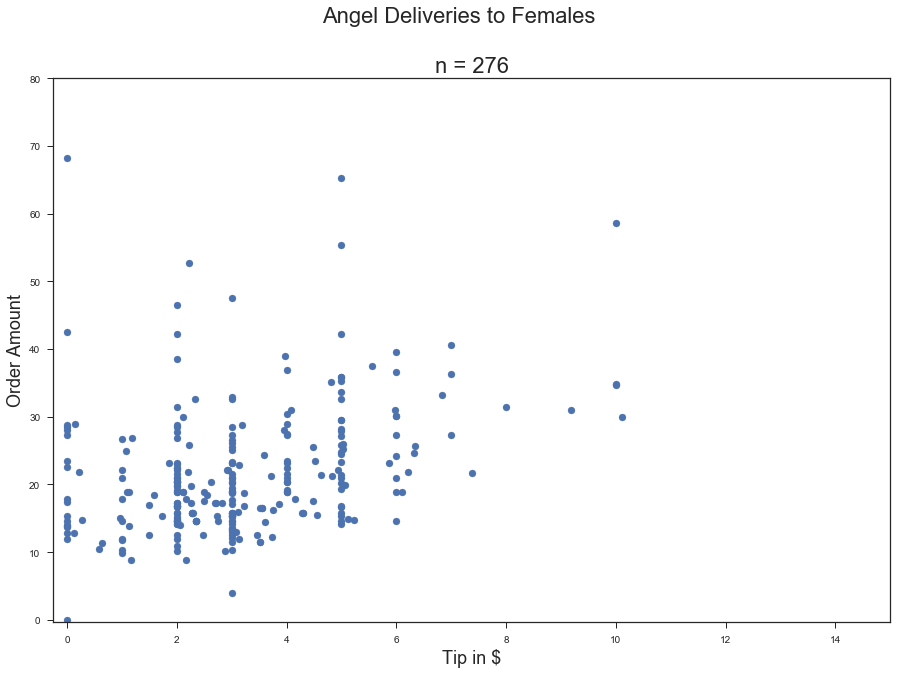

In [11]:
angel_female = angel_tip.loc[angel_tip['GenderOfTipper'] == 'Female']
create_scatter(angel_female, 'Angel Deliveries to Females')

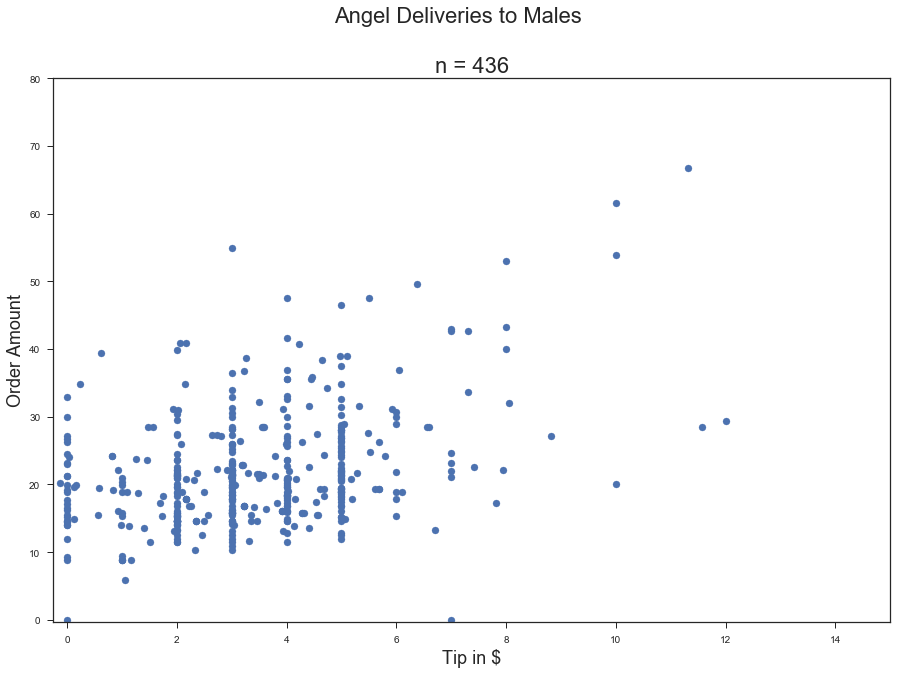

In [12]:
angel_male = angel_tip.loc[angel_tip['GenderOfTipper'] == 'Male']
create_scatter(angel_male, 'Angel Deliveries to Males')

#There is an excluded outlier in this data. A $25 tip from a very drunk man. I excluded it from the
#scatter plot so that all of the x axes could be the same

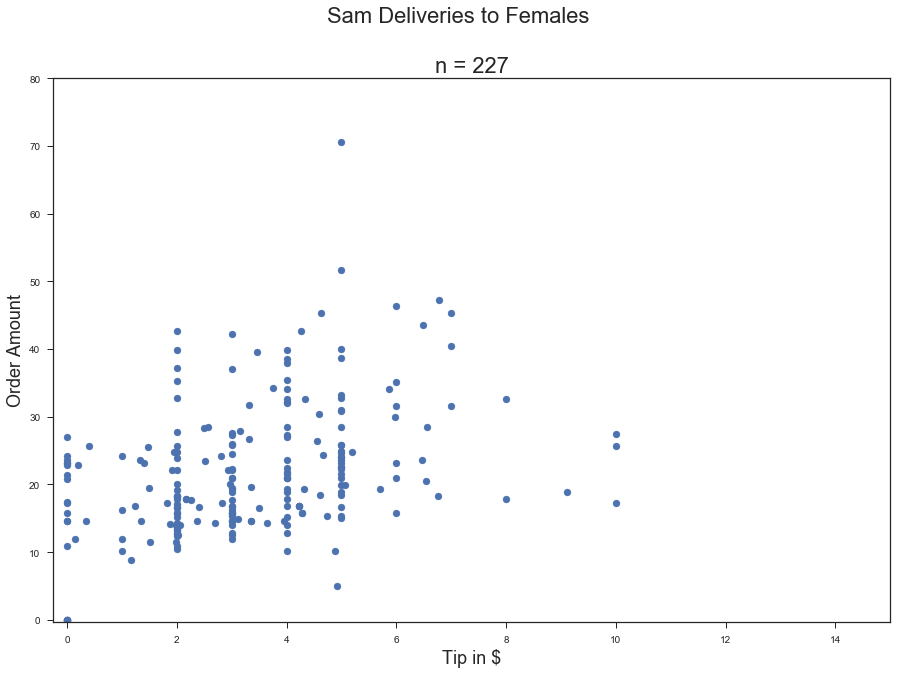

In [13]:
sam_female = sam_tip.loc[sam_tip['GenderOfTipper'] == 'Female']
create_scatter(sam_female, 'Sam Deliveries to Females')

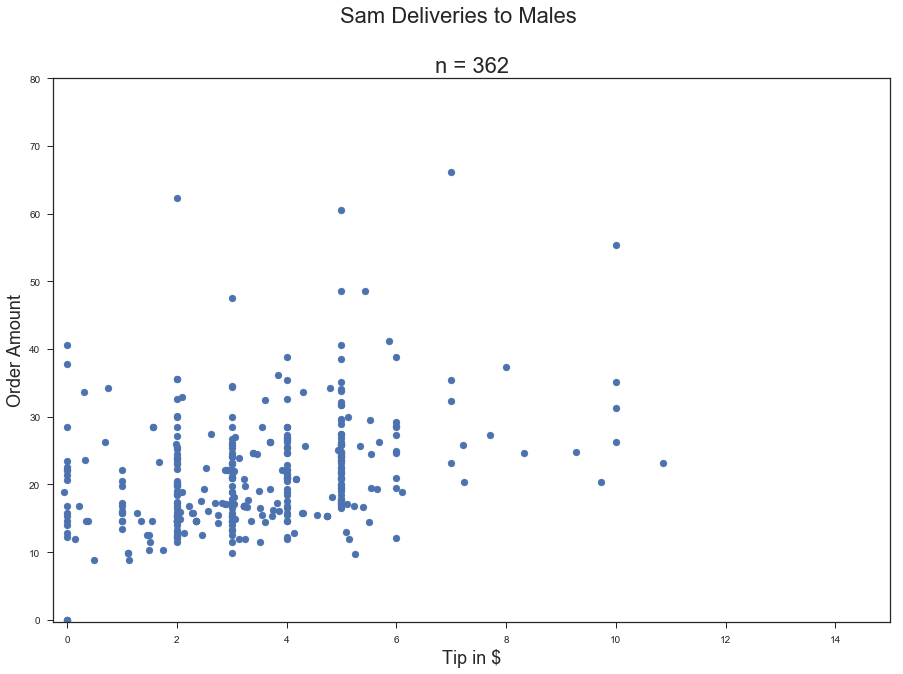

In [14]:
sam_male = sam_tip.loc[sam_tip['GenderOfTipper'] == 'Male']
create_scatter(sam_male, 'Sam Deliveries to Males')

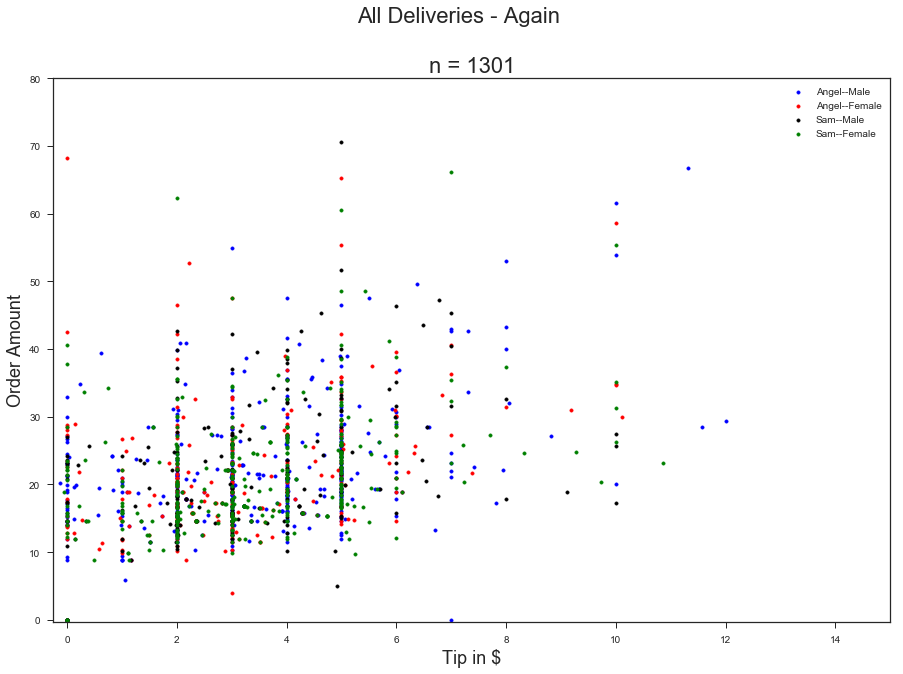

In [15]:
pl.ylabel(ylabel)
pl.xlabel(xlabel)
pl.scatter(angel_male.Tip, angel_male.OrderAmount, color='blue', marker='.', label='Angel--Male')
pl.scatter(angel_female.Tip, angel_female.OrderAmount, color='red', marker='.', label='Angel--Female')
pl.scatter(sam_female.Tip, sam_female.OrderAmount, color='black', marker='.', label='Sam--Male')
pl.scatter(sam_male.Tip, sam_male.OrderAmount, color='green', marker='.', label='Sam--Female')
n = len(angel_male) + len(angel_female) + len(sam_female) + len(sam_male)
pl.title('n = %s' %n)
pl.title('n = %s' %n, fontsize=22)
pl.suptitle('All Deliveries - Again', fontsize =22)    
pl.ylabel(ylabel, fontsize=18)
pl.xlabel(xlabel, fontsize=18)
pl.xlim(-0.25, 15)
pl.ylim(-0.30, 80)
pl.rcParams['figure.figsize'] = (20, 15)
pl.legend()
pl.show()

Four scatter plots side by side.

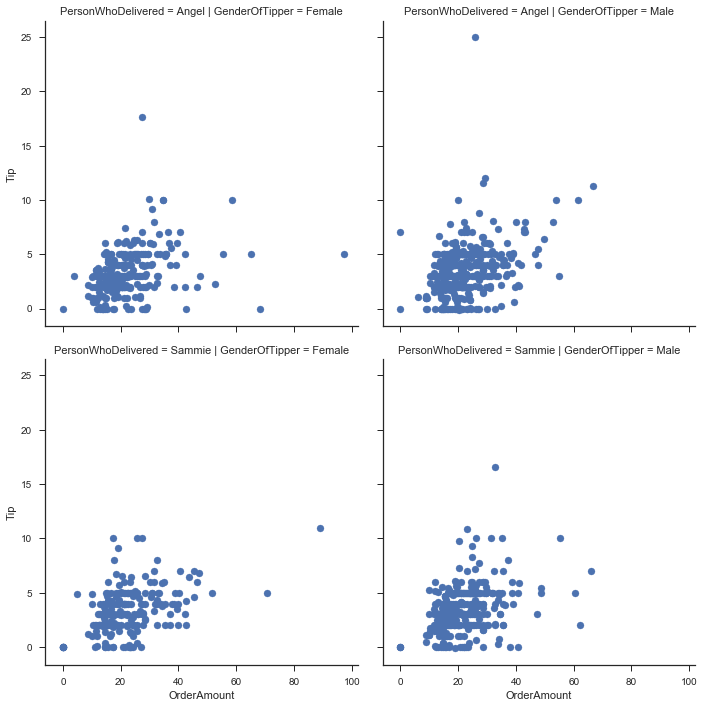

In [16]:
# Use facetting in order to do this more efficiently
xyplots = sns.FacetGrid(data, col="GenderOfTipper", row="PersonWhoDelivered", size=5)
xyplots.map(pl.scatter,"OrderAmount","Tip")

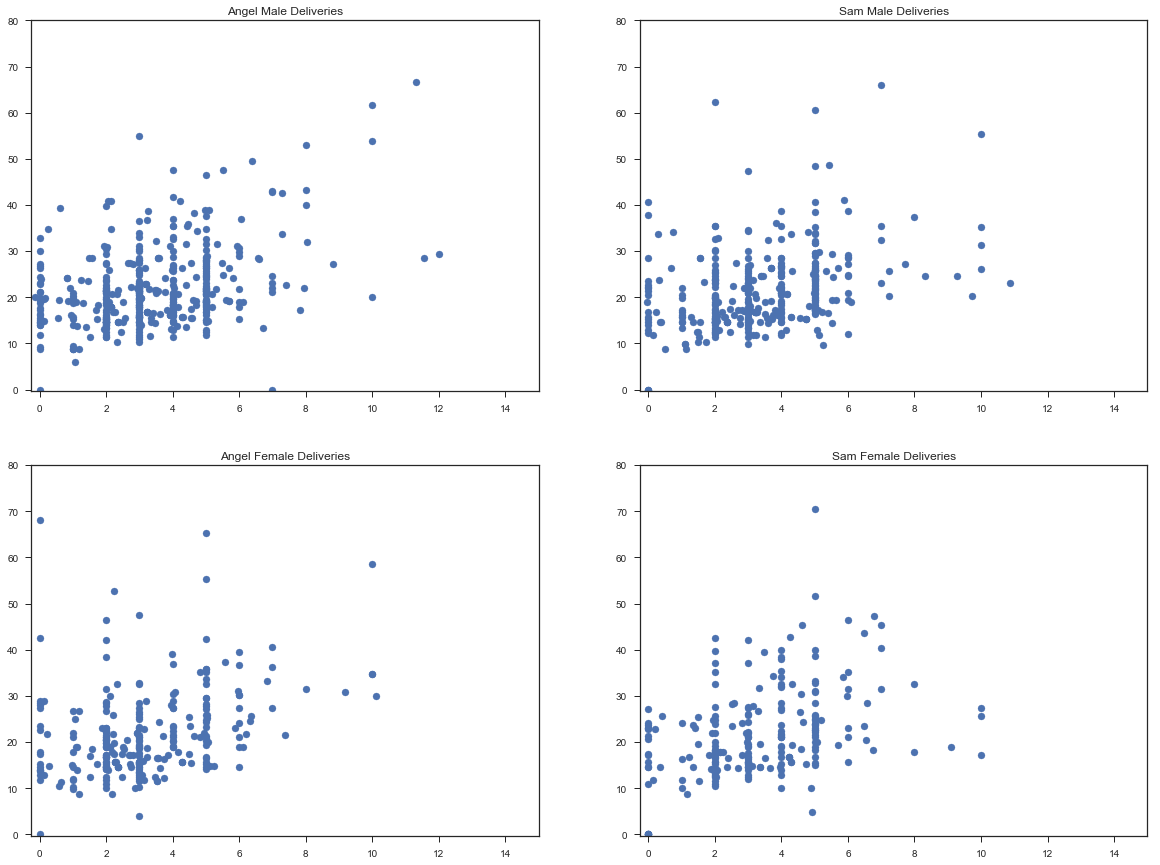

In [17]:
import numpy as np

f, axarr = pl.subplots(2, 2)
xmin = -0.25
xmax = 15
ymin = -0.30
ymax = 80


axarr[0, 0].set_xlim([xmin, xmax]) #I tried a for each loop so I didn't have to repeat this code 4 times but couldn't
axarr[0, 0].set_ylim([ymin, ymax]) #figure it out. something like  #for i in axarr[0, :]:
axarr[0, 0].scatter(angel_male.Tip, angel_male.OrderAmount)            #axarr[i, :].set_xlim()
axarr[0, 0].set_title('Angel Male Deliveries')

axarr[0, 1].set_xlim([xmin, xmax])
axarr[0, 1].set_ylim([ymin, ymax]) 
axarr[0, 1].scatter(sam_male.Tip, sam_male.OrderAmount)
axarr[0, 1].set_title('Sam Male Deliveries')

axarr[1, 0].set_xlim([xmin, xmax])
axarr[1, 0].set_ylim([ymin, ymax]) 
axarr[1, 0].scatter(angel_female.Tip, angel_female.OrderAmount)
axarr[1, 0].set_title('Angel Female Deliveries')

axarr[1, 1].set_xlim([xmin, xmax])
axarr[1, 1].set_ylim([ymin, ymax]) 
axarr[1, 1].scatter(sam_female.Tip, sam_female.OrderAmount)
axarr[1, 1].set_title('Sam Female Deliveries')